In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
energydata = np.loadtxt('energy.data')

x = energydata[:,0]
ex = energydata[:,1]
x = x*np.pi/180
y = energydata[:,2]
ey = energydata[:,3]

In [3]:
def fitfunc (x, Eg, e, c):
	return Eg /(1+e*(1-np.cos(x))) + c

In [4]:
popt1, pcov1 = curve_fit(fitfunc, x, y, p0=(662, 1.29, 0))
popt1, np.sqrt(np.diag(pcov1))

(array([713.55112059,   1.02253626, -69.55754562]),
 array([62.87780997,  0.24592655, 68.48011527]))

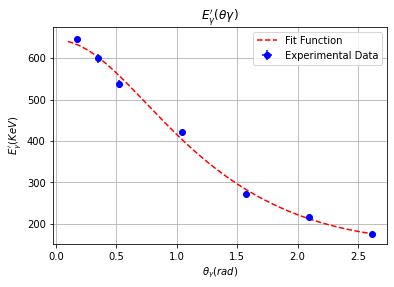

In [5]:
th = np.linspace(0.1, 2.6, 1000)
plt.plot(th, fitfunc(th, *popt1), 'r--')
plt.errorbar(x, y, ey, ex, 'bo')
plt.grid()

plt.xlabel(r'$\theta_\gamma (rad)$')
plt.ylabel(r'$E_\gamma ^\prime (KeV)$')
plt.title(r'$E_\gamma ^\prime (\theta\gamma )$')

plt.legend(['Fit Function', 'Experimental Data'])
plt.savefig('energyplot.png', dpi=500)

In [6]:
def intensityfunc (x, a, e, b):
	#return a*(1/(1+e*(1-np.cos(x))))**2 * (1+np.cos(x)**2)/2 * (1+ (e**2*(1-np.cos(x))**2)/(  (1+np.cos(x)**2)  *  (1 + e*(1-np.cos(x))) ))


	return a * (1+e*(1-np.cos(x)))**(-2)/2 * (1+np.cos(x)**2) * (1 + (e**2 *(1-np.cos(x))**2)/((1+np.cos(x)**2)*(1+e*(1-np.cos(x))))) + b

In [7]:
intensitydata = np.loadtxt('intensity.data')

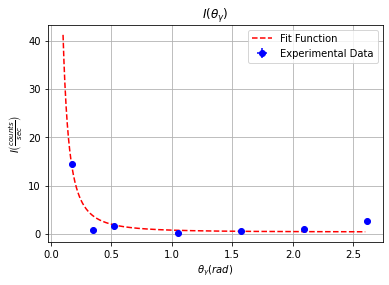

In [8]:
popt2, pcov2 = curve_fit(intensityfunc, x, intensitydata, p0=(20, 1.2955, 0))
popt2
plt.errorbar(x, intensitydata,ex, ex, 'bo')
plt.plot(th, intensityfunc(th, *popt2), 'r--')
plt.grid()

plt.xlabel(r'$\theta _\gamma (rad)$')
plt.ylabel(r'$I  \left(\frac{counts}{sec}\right)$')
plt.title(r'$I (\theta_\gamma )$')

plt.legend(['Fit Function', 'Experimental Data'])
plt.savefig('intensityplot.png', dpi=500)


In [9]:
print('Energy function fitting results')
print(r'Εγ = ',popt1[0], '+/-', np.sqrt(np.diag(pcov1)[0]))
print(r'ε = ', popt1[1], '+/-', np.sqrt(np.diag(pcov1)[1]))
print('=============================================')
print('=============================================')

print('Ποσοστιαία απόκλιση Εγ')
print(np.abs(662-popt1[0])/662*100, '%')
print('=============================================')
print('Σχετική Απόκλιση Εγ')
print(np.abs(662-popt1[0])/np.sqrt(np.diag(pcov1)[0]), 'σ')
print('=============================================')
print('Σχετικό σφάλμα Εγ')
print(np.sqrt(np.diag(pcov1)[0])/popt1[0]*100, '%')

print('=============================================')
print('=============================================')

print('Ποσοστιαία απόκλιση ε')
print(np.abs(1.2955 - popt1[1])/1.2955*100, '%')
print('=============================================')
print('σχετική απόκλιση ε')
print(np.abs(1.2955-popt1[1])/np.sqrt(np.diag(pcov1)[1]),'σ')
print('=============================================')
print('Σχετικό σφάλμα ε')
print(np.sqrt(np.diag(pcov1)[1])/popt1[1]*100,'%')

Energy function fitting results
Εγ =  713.5511205947463 +/- 62.87780996918827
ε =  1.0225362578765513 +/- 0.2459265527461078
Ποσοστιαία απόκλιση Εγ
7.78717833757497 %
Σχετική Απόκλιση Εγ
0.8198618975439452 σ
Σχετικό σφάλμα Εγ
8.811955885764638 %
Ποσοστιαία απόκλιση ε
21.0701460535275 %
σχετική απόκλιση ε
1.1099400982750076 σ
Σχετικό σφάλμα ε
24.050643764633918 %


In [15]:
popt2

array([1.48941617e+09, 3.64510063e+09, 3.45834889e-01])

In [11]:
print('Ποσοστιαία απόκλιση ε')
print(np.abs(1.2955-popt2[1])/1.2955*100)
print('Σχετική απόκλιση ε')
print(np.abs(1.2955-popt2[1])/np.sqrt(np.diag(pcov2)[1]))

Ποσοστιαία απόκλιση ε
281366316216.7456
Σχετική απόκλιση ε
1.3002983267781557e-07


In [12]:
def theorintensity (x):
	e=1.2955
	return 13*(2.82*10**(-13))**2 *  (1+e*(1-np.cos(x)))**(-2)/2 * (1+np.cos(x)**2) * (1 + (e**2 *(1-np.cos(x))**2)/((1+np.cos(x)**2)*(1+e*(1-np.cos(x)))))

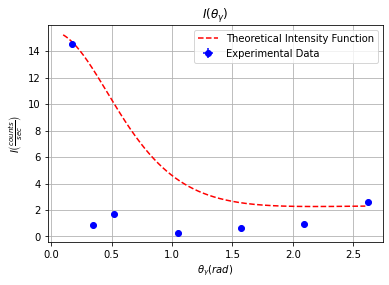

In [13]:
plt.errorbar(x, intensitydata, ex, ex, 'bo')
plt.plot(th, 1.5*10**25 *theorintensity(th), 'r--')
plt.xlabel(r'$\theta _\gamma (rad)$')
plt.ylabel(r'$I  \left(\frac{counts}{sec}\right)$')
plt.title(r'$I (\theta_\gamma )$')
plt.legend(['Theoretical Intensity Function', 'Experimental Data'])
plt.grid()
plt.savefig('correctintensity.png', dpi=500)

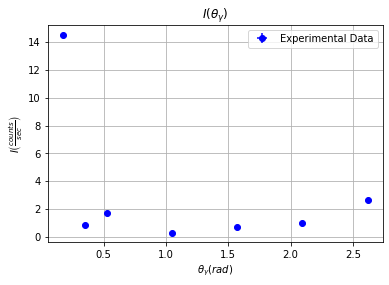

In [14]:
plt.errorbar(x, intensitydata,ex, ex, 'bo')
plt.grid()

plt.xlabel(r'$\theta _\gamma (rad)$')
plt.ylabel(r'$I  \left(\frac{counts}{sec}\right)$')
plt.title(r'$I (\theta_\gamma )$')

plt.legend(['Experimental Data'])
plt.savefig('intensityonlyplot.png', dpi=500)